# DATA PREPARATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# reading csv files
customer=pd.read_csv('customer.csv')
price=pd.read_csv('price.csv')
sales=pd.read_csv('sales_monthly.csv')
product=pd.read_csv('product.csv')
discount=pd.read_csv('discount.csv')
cost=pd.read_csv('cost.csv')


In [3]:
customer.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [4]:
customer.loc[customer['customer']== 'Amazon ', 'customer'] = 'Amazon'

In [5]:
price.head()

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875


In [6]:
sales.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0


In [7]:
discount.head()

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057


In [8]:
product.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [9]:
cost.head()

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036


# DATA CLEANING

In [10]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       183 non-null    object
 6   region         183 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


There are null values in some cells of "sub_zone" and "region" so let us fill those with some variable to avoid errors

In [11]:
customer.fillna('NA',inplace=True)

In [12]:
customer['customer_code']=customer['customer_code'].astype('str')

In [13]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67251 entries, 0 to 67250
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67251 non-null  object 
 1   product_code   67251 non-null  object 
 2   customer_code  67250 non-null  float64
 3   sold_quantity  67250 non-null  float64
 4   fiscal_year    67250 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.6+ MB


There is one extra last row with product_code A0 in sales table so let us drop it

In [15]:
sales[sales['product_code']=='A0'].index
sales.drop(sales[sales['product_code']=='A0'].index,inplace=True)

In [16]:
sales['customer_code']=sales['customer_code'].astype('int')

In [17]:
sales['customer_code']=sales['customer_code'].astype('str')
sales['fiscal_year']=sales['fiscal_year'].astype('int')

In [22]:
discount['customer_code']=discount['customer_code'].astype('str')

In [23]:
# MERGING DATA FRAMES FOR ANALYSIS

In [24]:
#creating new column id to merge tables
sales['id']=sales['product_code']+'_'+sales['fiscal_year'].astype('str')
price['id']=price['product_code']+'_'+price['fiscal_year'].astype('str')
# merging sales and price dataframes
df=sales.merge(price[['id','gross_price']],on='id')
df

,date,product_code,customer_code,sold_quantity,fiscal_year,id,gross_price
0,2017-09-01,A0118150101,70002017,51.0,2018,A0118150101_2018,15.3952
1,2017-09-01,A0118150101,70002018,77.0,2018,A0118150101_2018,15.3952
2,2017-09-01,A0118150101,70003181,17.0,2018,A0118150101_2018,15.3952
3,2017-09-01,A0118150101,70003182,6.0,2018,A0118150101_2018,15.3952
4,2017-09-01,A0118150101,70006157,5.0,2018,A0118150101_2018,15.3952
...,...,...,...,...,...,...,...
67245,2019-06-01,A0418150104,90013122,10.0,2019,A0418150104_2019,17.5027
67246,2019-06-01,A0418150104,90013124,16.0,2019,A0418150104_2019,17.5027
67247,2019-06-01,A0418150104,90014136,2.0,2019,A0418150104_2019,17.5027
67248,2019-06-01,A0418150104,90014137,1.0,2019,A0418150104_2019,17.5027


In [25]:
# merging df and cost data frame
cost['id']=cost['product_code']+'_'+cost['cost_year'].astype('str')
df=df.merge(cost[['id','manufacturing_cost']],on='id')
df


,date,product_code,customer_code,sold_quantity,fiscal_year,id,gross_price,manufacturing_cost
0,2017-09-01,A0118150101,70002017,51.0,2018,A0118150101_2018,15.3952,4.6190
1,2017-09-01,A0118150101,70002018,77.0,2018,A0118150101_2018,15.3952,4.6190
2,2017-09-01,A0118150101,70003181,17.0,2018,A0118150101_2018,15.3952,4.6190
3,2017-09-01,A0118150101,70003182,6.0,2018,A0118150101_2018,15.3952,4.6190
4,2017-09-01,A0118150101,70006157,5.0,2018,A0118150101_2018,15.3952,4.6190
...,...,...,...,...,...,...,...,...
67245,2019-06-01,A0418150104,90013122,10.0,2019,A0418150104_2019,17.5027,5.3129
67246,2019-06-01,A0418150104,90013124,16.0,2019,A0418150104_2019,17.5027,5.3129
67247,2019-06-01,A0418150104,90014136,2.0,2019,A0418150104_2019,17.5027,5.3129
67248,2019-06-01,A0418150104,90014137,1.0,2019,A0418150104_2019,17.5027,5.3129


In [26]:
# merging df with discount
df['id']=df['customer_code']+'_'+df['fiscal_year'].astype('str')
discount['id']=discount['customer_code']+'_'+discount['fiscal_year'].astype('str')
df=df.merge(discount[['pre_invoice_discount_pct','id']],on='id')


In [27]:
df.rename(columns={'pre_invoice_discount_pct':'discount','manufacturing_cost':'cost'},inplace=True)
df

,date,product_code,customer_code,sold_quantity,fiscal_year,id,gross_price,cost,discount
0,2017-09-01,A0118150101,70002017,51.0,2018,70002017_2018,15.3952,4.6190,0.0824
1,2017-10-01,A0118150101,70002017,54.0,2018,70002017_2018,15.3952,4.6190,0.0824
2,2017-11-01,A0118150101,70002017,30.0,2018,70002017_2018,15.3952,4.6190,0.0824
3,2018-01-01,A0118150101,70002017,14.0,2018,70002017_2018,15.3952,4.6190,0.0824
4,2018-02-01,A0118150101,70002017,62.0,2018,70002017_2018,15.3952,4.6190,0.0824
...,...,...,...,...,...,...,...,...,...
67245,2021-11-01,A0321150303,90024184,31.0,2022,90024184_2022,30.3060,9.1877,0.2453
67246,2021-12-01,A0321150303,90024184,23.0,2022,90024184_2022,30.3060,9.1877,0.2453
67247,2021-10-01,A0418150103,90024184,23.0,2022,90024184_2022,21.0913,6.0345,0.2453
67248,2021-11-01,A0418150103,90024184,24.0,2022,90024184_2022,21.0913,6.0345,0.2453


In [28]:
#calculating revenue after discount and profit
df['revenue']=round(df['sold_quantity']*df['gross_price']*(1-df['discount']),2)
df['profit']=round(df['revenue']-df['cost']*df['sold_quantity'],2)
df

,date,product_code,customer_code,sold_quantity,fiscal_year,id,gross_price,cost,discount,revenue,profit
0,2017-09-01,A0118150101,70002017,51.0,2018,70002017_2018,15.3952,4.6190,0.0824,720.46,484.89
1,2017-10-01,A0118150101,70002017,54.0,2018,70002017_2018,15.3952,4.6190,0.0824,762.84,513.41
2,2017-11-01,A0118150101,70002017,30.0,2018,70002017_2018,15.3952,4.6190,0.0824,423.80,285.23
3,2018-01-01,A0118150101,70002017,14.0,2018,70002017_2018,15.3952,4.6190,0.0824,197.77,133.10
4,2018-02-01,A0118150101,70002017,62.0,2018,70002017_2018,15.3952,4.6190,0.0824,875.85,589.47
...,...,...,...,...,...,...,...,...,...,...,...
67245,2021-11-01,A0321150303,90024184,31.0,2022,90024184_2022,30.3060,9.1877,0.2453,709.03,424.21
67246,2021-12-01,A0321150303,90024184,23.0,2022,90024184_2022,30.3060,9.1877,0.2453,526.05,314.73
67247,2021-10-01,A0418150103,90024184,23.0,2022,90024184_2022,21.0913,6.0345,0.2453,366.10,227.31
67248,2021-11-01,A0418150103,90024184,24.0,2022,90024184_2022,21.0913,6.0345,0.2453,382.02,237.19


EXPLORATORY DATA ANALYSIS

**1) WHAT IS THE YEARLY PERFORMANCE BASED ON REVENUE AND PROFIT?

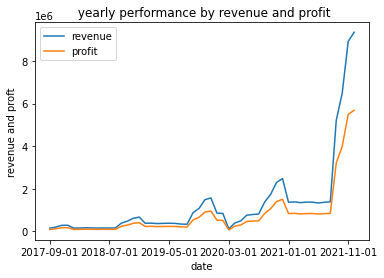

In [30]:
per=df.groupby('date')[['revenue','profit']].sum()
per.plot(kind='line')
plt.xlabel('date')
plt.ylabel('revenue and proft')
plt.title(' yearly performance by revenue and profit')
plt.show()

From the above plot it is clear that performance has decreased in "2020" (may be due to covid) increased at the end of "2021".

In [31]:
# merging df with customer dataframe
df=df.merge(customer[['customer_code','customer','platform','channel','market','sub_zone']],on='customer_code')
df

,date,product_code,customer_code,sold_quantity,fiscal_year,id,gross_price,cost,discount,revenue,profit,customer,platform,channel,market,sub_zone
0,2017-09-01,A0118150101,70002017,51.0,2018,70002017_2018,15.3952,4.6190,0.0824,720.46,484.89,Atliq Exclusive,Brick & Mortar,Direct,India,India
1,2017-10-01,A0118150101,70002017,54.0,2018,70002017_2018,15.3952,4.6190,0.0824,762.84,513.41,Atliq Exclusive,Brick & Mortar,Direct,India,India
2,2017-11-01,A0118150101,70002017,30.0,2018,70002017_2018,15.3952,4.6190,0.0824,423.80,285.23,Atliq Exclusive,Brick & Mortar,Direct,India,India
3,2018-01-01,A0118150101,70002017,14.0,2018,70002017_2018,15.3952,4.6190,0.0824,197.77,133.10,Atliq Exclusive,Brick & Mortar,Direct,India,India
4,2018-02-01,A0118150101,70002017,62.0,2018,70002017_2018,15.3952,4.6190,0.0824,875.85,589.47,Atliq Exclusive,Brick & Mortar,Direct,India,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2021-10-01,A0321150303,90020102,36.0,2022,90020102_2022,30.3060,9.1877,0.3011,762.51,431.75,Fnac-Darty,Brick & Mortar,Retailer,Austria,NE
67246,2021-12-01,A0321150303,90020102,64.0,2022,90020102_2022,30.3060,9.1877,0.3011,1355.58,767.57,Fnac-Darty,Brick & Mortar,Retailer,Austria,NE
67247,2021-09-01,A0418150103,90020102,17.0,2022,90020102_2022,21.0913,6.0345,0.3011,250.59,148.00,Fnac-Darty,Brick & Mortar,Retailer,Austria,NE
67248,2021-10-01,A0418150103,90020102,33.0,2022,90020102_2022,21.0913,6.0345,0.3011,486.44,287.30,Fnac-Darty,Brick & Mortar,Retailer,Austria,NE


In [32]:
# merging df with product data frame
df=df.merge(product[['product_code','division','segment','category','product','variant']],on='product_code')
df

,date,product_code,customer_code,sold_quantity,fiscal_year,id,gross_price,cost,discount,revenue,...,customer,platform,channel,market,sub_zone,division,segment,category,product,variant
0,2017-09-01,A0118150101,70002017,51.0,2018,70002017_2018,15.3952,4.6190,0.0824,720.46,...,Atliq Exclusive,Brick & Mortar,Direct,India,India,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,2017-10-01,A0118150101,70002017,54.0,2018,70002017_2018,15.3952,4.6190,0.0824,762.84,...,Atliq Exclusive,Brick & Mortar,Direct,India,India,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
2,2017-11-01,A0118150101,70002017,30.0,2018,70002017_2018,15.3952,4.6190,0.0824,423.80,...,Atliq Exclusive,Brick & Mortar,Direct,India,India,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
3,2018-01-01,A0118150101,70002017,14.0,2018,70002017_2018,15.3952,4.6190,0.0824,197.77,...,Atliq Exclusive,Brick & Mortar,Direct,India,India,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
4,2018-02-01,A0118150101,70002017,62.0,2018,70002017_2018,15.3952,4.6190,0.0824,875.85,...,Atliq Exclusive,Brick & Mortar,Direct,India,India,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2021-06-01,A0321150303,90020102,2.0,2021,90020102_2021,28.0059,8.4291,0.2054,44.51,...,Fnac-Darty,Brick & Mortar,Retailer,Austria,NE,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium
67246,2021-08-01,A0321150303,90020102,3.0,2021,90020102_2021,28.0059,8.4291,0.2054,66.76,...,Fnac-Darty,Brick & Mortar,Retailer,Austria,NE,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium
67247,2021-09-01,A0321150303,90020102,12.0,2022,90020102_2022,30.3060,9.1877,0.3011,254.17,...,Fnac-Darty,Brick & Mortar,Retailer,Austria,NE,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium
67248,2021-10-01,A0321150303,90020102,36.0,2022,90020102_2022,30.3060,9.1877,0.3011,762.51,...,Fnac-Darty,Brick & Mortar,Retailer,Austria,NE,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium


**2) WHO ARE THE KEY DRIVING CUSTOMERS CONTRIBUTING TO REVENUE?

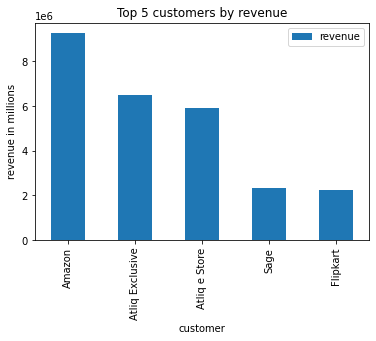

In [33]:
top_cust=df.groupby('customer')[['revenue']].sum().sort_values(by='revenue',ascending=False).head()
top_cust.plot(kind='bar')
plt.xlabel('customer')
plt.ylabel('revenue in millions')
plt.title('Top 5 customers by revenue')
plt.show()

**3) MOST IMPORTANT MARKETS REGARDING REVENUE?

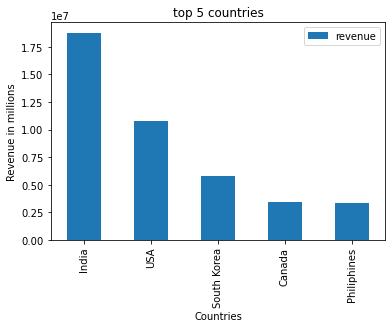

In [34]:
top_countries=df.groupby('market')[['revenue']].sum().sort_values(by='revenue',ascending=False).head()
top_countries.plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Revenue in millions')
plt.title('top 5 countries')
plt.show()

**4)WHAT ARE THE TOP PRODUCT CATEGORIES CONTRIBUTING TO PROFIT?

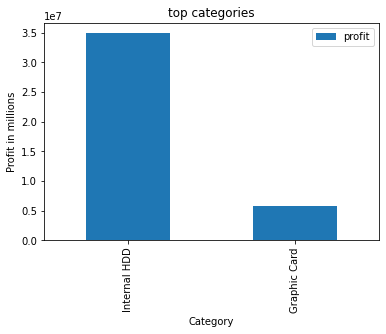

In [35]:
top_cat=df.groupby('category')[['profit']].sum().sort_values(by='profit',ascending=False)
top_cat.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Profit in millions')
plt.title('top categories')
plt.show()

**5) WHICH CUSTOMERS GOT MORE DISCOUNTS FROM ATLIQ?

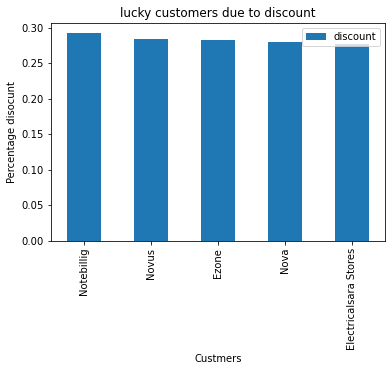

In [36]:
dis_cus=df.groupby('customer')[['discount']].mean().sort_values(by='discount',ascending=False).head()
dis_cus.plot(kind='bar')
plt.xlabel('Custmers')
plt.ylabel('Percentage disocunt')
plt.title('lucky customers due to discount')
plt.show()

From the above plot it is clear that, though "Amazon" is contributing more to revenue it is not getting more discounts. 
SO, there is another criteria for discounts.

**6)HOW COUNT OF ORDERS IN TERMS OF SELLING QUANTITY HAVE BEEN CHANGING THROUGHOUT YEARS?

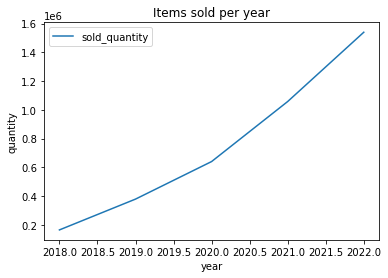

In [37]:
ordercount=df.groupby('fiscal_year')[['sold_quantity']].sum().sort_values(by='sold_quantity',ascending=False)
ordercount.plot(kind='line')
plt.xlabel('year')
plt.ylabel('quantity')
plt.title('Items sold per year')
plt.show()

**7) WHAT ARE THE MOST DEMANDING PRODUCTS IN TERMS OF SELLING QUANTITY AND THEIR PERCENTAGE CONTRIBUTION TO PROFIT?

In [38]:
top_prod=df.groupby('product')[['sold_quantity','profit']].sum().sort_values(by='sold_quantity',ascending=False).reset_index()
top_prod['%profit']=top_prod['profit']*100/df['profit'].sum()
top_prod

,product,sold_quantity,profit,%profit
0,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,1211581.0,11911328.58,29.321825
1,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,1075354.0,12238246.10,30.126590
2,AQ Zion Saga,843464.0,10758938.04,26.485013
3,AQ Mforce Gen X,652536.0,5714227.15,14.066572


**8)HOW ARE THE MANUFACTURING COSTS VARYING YEARLY?

In [39]:
cos=df.groupby('fiscal_year')[['cost']].sum()
cos.plot(kind='line')
plt.xlabel('year')
plt.ylabel('cost')
plt

,cost
fiscal_year,
2018,37848.7129
2019,71823.5165
2020,120389.3706
2021,143267.0133
2022,42751.7442
